<a href="https://colab.research.google.com/github/arekangel/AI_AUTH_2025_Areklakis_Aggelos/blob/main/ml9hergasia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip -q install swig
!pip -q install "gymnasium[box2d]"
!pip -q install "ray[rllib]"
!pip -q install renderlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


3

In [ ]:
step: it implements an action that helpw the game move forward in time
render:visualizes the environment
reset :restarts the enviroment

4

the observation space is a 8 value vector (x,y,xspeed,yspeed etc(
the action space  it consints of 4 discrete commands

5

In [4]:
import gymnasium as gym

env = gym.make("LunarLander-v3")
print("Obs space:", env.observation_space)
print("Act space:", env.action_space)
env.close()

Obs space: Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)
Act space: Discrete(4)


In [2]:
import ray
from ray.rllib.algorithms.ppo import PPOConfig

ray.shutdown()
ray.init(ignore_reinit_error=True)

config = PPOConfig()
config.use_critic = True
config.use_gae = True
config.lambda_ = 0.95
config.kl_coeff = 1.0
config.num_sgd_iter = 30
config.sgd_minibatch_size = 32
config.num_env_runners = 0
config.shuffle_sequences = True
config.vf_loss_coeff = 0.5
config.entropy_coeff = 0.001
config.clip_param = 0.2


config = config.environment(env="LunarLander-v3")


config = config.framework("torch")

agent = config.build()
result = agent.train()
print("episode_return_mean:", result["env_runners"]["episode_return_mean"])


(pid=4108) [2026-01-15 09:59:33,847 E 4108 4198] core_worker_process.cc:842: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14
2026-01-15 10:00:18,400	INFO worker.py:2007 -- Started a local Ray instance.
2026-01-15 10:00:28,761	WARNING util.py:61 -- Install gputil for GPU system monitoring.
(pid=gcs_server) [2026-01-15 10:00:42,673 E 4552 4552] (gcs_server) gcs_server.cc:303: Failed to establish connection to the event+metrics exporter agent. Events and metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14
(raylet) [2026-01-15 10:00:48,353 E 4637 4637] (raylet) main.cc:1032: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14


episode_return_mean: -164.88155066294624


6

/usr/local/lib/python3.12/dist-packages/ray/rllib/utils/metrics/stats/ema.py:124: RuntimeWarning: Mean of empty slice
  return np.nanmean(self._values_to_merge)


Iteration 1, Average Reward: -178.14399842936868
Iteration 2, Average Reward: -146.79585546847352
Iteration 3, Average Reward: -145.04664632071876
Iteration 4, Average Reward: -111.82095668597863
Iteration 5, Average Reward: -117.38771582748328
Iteration 6, Average Reward: -105.53088265782893
Iteration 7, Average Reward: -94.59029632237824
Iteration 8, Average Reward: -79.17986091465777
Iteration 9, Average Reward: -78.68759325821208
Iteration 10, Average Reward: -58.07815851574974
Iteration 11, Average Reward: -80.81558072879672
Iteration 12, Average Reward: -55.97547952010625
Iteration 13, Average Reward: -60.81959020537103
Iteration 14, Average Reward: -40.29038282192945
Iteration 15, Average Reward: -45.067022214162975
Iteration 16, Average Reward: -54.59304484412682
Iteration 17, Average Reward: 17.587292611394005
Iteration 18, Average Reward: -15.191882911502892
Iteration 19, Average Reward: -8.086962790541396
Iteration 20, Average Reward: -31.0173810490496
Iteration 21, Average 

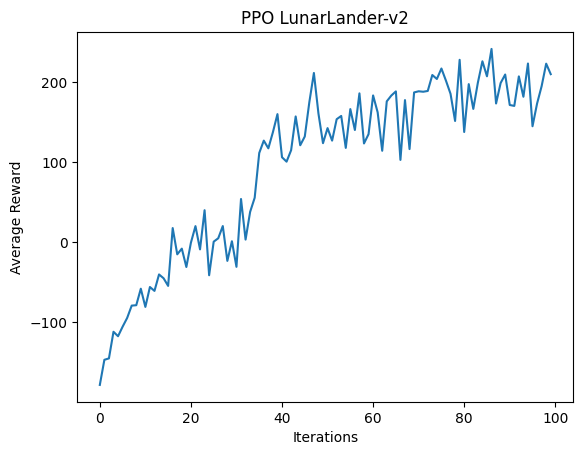

In [3]:
import matplotlib.pyplot as plt

train_iterations = 100
average_rewards_per_iteration = []

for i in range(train_iterations):
    result = agent.train()
    avg_reward = result["env_runners"]["episode_return_mean"]
    average_rewards_per_iteration.append(avg_reward)
    print(f"Iteration {i+1}, Average Reward: {avg_reward}")

plt.plot(average_rewards_per_iteration)
plt.title("PPO LunarLander-v2")
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.show()